# Импорт данных и библеотек


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import torch
import cv2

In [ ]:
data_train = pd.read_csv('/content/drive/MyDrive/data/train (1).csv')
data_train.head(5)

path            label
0   46.jpg           Amoeba
1  497.jpg     Rod_bacteria
2  659.jpg  Spiral_bacteria
3  275.jpg            Hydra
4  651.jpg  Spiral_bacteria

# Анализ данных

In [ ]:
def returnPath(path):
  return '/content/drive/MyDrive/data/hackData2/'+path

data_train['path'] = data_train['path'].apply(returnPath)
data_train.head(5)

path            label
0   /content/drive/MyDrive/data/hackData2/46.jpg           Amoeba
1  /content/drive/MyDrive/data/hackData2/497.jpg     Rod_bacteria
2  /content/drive/MyDrive/data/hackData2/659.jpg  Spiral_bacteria
3  /content/drive/MyDrive/data/hackData2/275.jpg            Hydra
4  /content/drive/MyDrive/data/hackData2/651.jpg  Spiral_bacteria

In [ ]:
data_train['path'][0]

'/content/drive/MyDrive/data/hackData2/46.jpg'

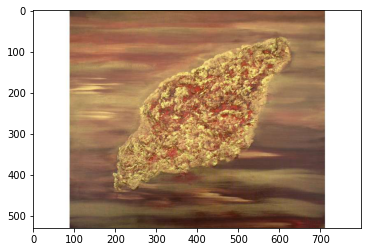

In [ ]:
def showImage(src):
  img = Image.open(src)
  fig = plt.figure(figsize=(6, 4))
  ax = fig.add_subplot()
  ax.imshow(img)
  
  plt.show()

showImage(data_train['path'][0])

In [ ]:
data_train['label'].value_counts()

Euglena               119
Paramecium            107
Spherical_bacteria     61
Rod_bacteria           60
Spiral_bacteria        56
Hydra                  54
Yeast                  48
Amoeba                 47
Name: label, dtype: int64

<BarContainer object of 8 artists>

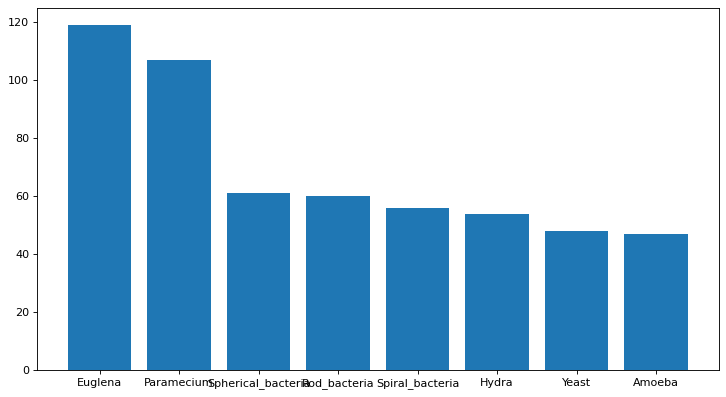

In [ ]:
data = dict(data_train['label'].value_counts())

plt.figure(figsize=(11, 6), dpi=80)
plt.bar(data.keys(), data.values()) 
#нужно попробовать сделать умную и тупую аугментацию, для уравнения выборки и без

# Обработка данных

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_train['path'], data_train['label'])

In [ ]:
X_train

475    /content/drive/MyDrive/data/hackData2/739.jpg
151    /content/drive/MyDrive/data/hackData2/453.jpg
301    /content/drive/MyDrive/data/hackData2/408.jpg
200    /content/drive/MyDrive/data/hackData2/228.jpg
104    /content/drive/MyDrive/data/hackData2/523.jpg
                           ...                      
80      /content/drive/MyDrive/data/hackData2/39.jpg
515    /content/drive/MyDrive/data/hackData2/317.jpg
6      /content/drive/MyDrive/data/hackData2/667.jpg
32      /content/drive/MyDrive/data/hackData2/96.jpg
190    /content/drive/MyDrive/data/hackData2/757.jpg
Name: path, Length: 414, dtype: object

In [ ]:
y_train

475              Yeast
151         Paramecium
301         Paramecium
200            Euglena
104       Rod_bacteria
            ...       
80              Amoeba
515         Paramecium
6      Spiral_bacteria
32             Euglena
190              Yeast
Name: label, Length: 414, dtype: object

In [ ]:
le = LabelEncoder().fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

In [ ]:
y_train

array([7, 3, 3, 1, 4, 0, 0, 1, 6, 6, 0, 1, 3, 0, 4, 3, 2, 0, 0, 2, 5, 6,
       7, 6, 3, 5, 4, 1, 6, 5, 7, 1, 7, 3, 5, 7, 2, 1, 5, 4, 2, 1, 2, 6,
       1, 1, 5, 6, 3, 3, 3, 1, 2, 4, 1, 4, 3, 3, 2, 4, 0, 3, 1, 1, 2, 1,
       7, 1, 4, 2, 7, 7, 7, 3, 7, 2, 1, 0, 3, 5, 1, 3, 5, 2, 5, 6, 3, 3,
       1, 1, 6, 6, 5, 3, 1, 3, 4, 7, 1, 0, 7, 4, 1, 2, 5, 1, 5, 6, 1, 3,
       0, 5, 4, 1, 6, 4, 6, 2, 0, 5, 7, 3, 3, 4, 0, 3, 0, 5, 3, 3, 3, 0,
       5, 0, 6, 3, 2, 1, 3, 4, 1, 0, 1, 3, 4, 7, 1, 3, 0, 2, 2, 7, 1, 7,
       3, 1, 2, 4, 6, 6, 1, 3, 4, 2, 0, 1, 4, 0, 2, 1, 3, 3, 3, 3, 1, 1,
       4, 5, 3, 3, 5, 2, 7, 3, 1, 0, 4, 4, 1, 4, 5, 1, 4, 3, 3, 3, 0, 1,
       1, 7, 6, 1, 1, 4, 1, 3, 6, 1, 3, 0, 0, 0, 0, 3, 1, 6, 1, 5, 1, 5,
       2, 5, 7, 7, 1, 1, 5, 7, 1, 5, 2, 0, 5, 3, 2, 0, 3, 0, 3, 5, 5, 6,
       4, 7, 5, 3, 0, 4, 1, 2, 4, 5, 6, 3, 3, 1, 3, 3, 0, 4, 4, 4, 0, 5,
       6, 4, 6, 4, 3, 3, 6, 7, 0, 1, 5, 7, 1, 6, 4, 7, 5, 1, 7, 1, 4, 5,
       1, 1, 6, 5, 2, 1, 6, 2, 0, 4, 1, 4, 4, 2, 0,

In [ ]:
def ImageToData(path):
  img = cv2.imread(path)
  frame = cv2.resize(img, (128, 128), interpolation = cv2.INTER_AREA)
  gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  return np.array(gray)

In [ ]:
X_train = np.array([*X_train.apply(ImageToData)])

In [ ]:
X_test = np.array([*X_test.apply(ImageToData)])

In [ ]:
X_train

array([[[168, 165, 161, ..., 164, 162, 164],
        [169, 164, 160, ..., 166, 163, 167],
        [169, 163, 158, ..., 168, 165, 166],
        ...,
        [172, 171, 169, ..., 171, 171, 172],
        [171, 171, 171, ..., 169, 169, 172],
        [171, 171, 171, ..., 171, 171, 172]],

       [[  8,   9,  11, ...,   7,   7,   8],
        [  8,   8,  10, ...,   7,   7,   7],
        [ 10,   8,   8, ...,   7,   7,   7],
        ...,
        [  6,   7,   7, ...,   6,   7,   7],
        [  6,   7,   7, ...,   7,   7,   7],
        [  6,   6,   7, ...,   7,   7,   7]],

       [[165, 167, 165, ..., 161, 161, 162],
        [205, 207, 204, ..., 199, 199, 200],
        [207, 206, 202, ..., 201, 201, 201],
        ...,
        [198, 199, 200, ..., 193, 193, 192],
        [198, 198, 199, ..., 203, 195, 192],
        [195, 195, 196, ..., 194, 191, 188]],

       ...,

       [[197, 208, 227, ..., 220, 219, 217],
        [169, 214, 225, ..., 217, 219, 218],
        [201, 218, 221, ..., 217, 220, 219

In [ ]:
X_train.shape

(414, 128, 128)

In [ ]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [ ]:
X_train.shape

torch.Size([414, 128, 128])

In [ ]:
X_test.shape

torch.Size([138, 128, 128])

In [ ]:
X_train = np.reshape(X_train, (414, 1, 128, 128))
X_test = np.reshape(X_test, (138, 1, 128, 128))

# Создание модели

In [ ]:
from torchvision.models import resnet50
import torch.optim as optim

model = resnet50(pretrained=True)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

In [ ]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
model.fc = torch.nn.Sequential(torch.nn.Linear(in_features=2048, out_features=8, bias=True), torch.nn.Softmax())
model.conv1 = torch.nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)

In [ ]:
def train(model, X_train, y_train, X_test, y_test):
    device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
    model = model.to(device)
    loss = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-5)
    
    batch_size = 50

    test_accuracy_history = []
    test_loss_history = []
    predss = []

    X_test = X_test.to(device)
    y_test = y_test.to(device)

    for epoch in range(25):
        order = np.random.permutation(len(X_train))
        for start_index in range(0, len(X_train), batch_size):
            optimizer.zero_grad()
            model.train()

            batch_indexes = order[start_index:start_index+batch_size]

            X_batch = X_train[batch_indexes].to(device)
            y_batch = y_train[batch_indexes].to(device)

            preds = model.forward(X_batch)

            loss_value = loss(preds, y_batch)
            loss_value.backward()
            # print((preds * 1000).to(int)/1000, y_test[int(start_index/batch_size)])
            optimizer.step()
            
            X_batch

        with torch.no_grad():
          model.eval()
          test_preds = model.forward(X_test)
          test_loss_history.append(loss(test_preds, y_test).data.cpu())
          predss.append(test_preds)
          accuracy = (test_preds.argmax(dim=1) == y_test).float().mean().data.cpu()
          test_accuracy_history.append(accuracy)

        print(accuracy, test_loss_history[epoch], sum(test_preds[0]))
    del model
    return test_accuracy_history, test_loss_history, predss

In [ ]:
accuracies, losses, preds = train(model, X_train, y_train, X_test, y_test)

/usr/local/lib/python3.8/dist-packages/torch/nn/modules/container.py:204: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


tensor(0.2101) tensor(2.0753) tensor(1.0000, device='cuda:0')
tensor(0.2029) tensor(2.0643) tensor(1., device='cuda:0')
tensor(0.2246) tensor(2.0494) tensor(1.0000, device='cuda:0')
tensor(0.2681) tensor(2.0343) tensor(1.0000, device='cuda:0')
tensor(0.2754) tensor(2.0192) tensor(1., device='cuda:0')
tensor(0.2681) tensor(2.0091) tensor(1., device='cuda:0')
tensor(0.3116) tensor(1.9989) tensor(1.0000, device='cuda:0')
tensor(0.3478) tensor(1.9886) tensor(1., device='cuda:0')
tensor(0.3768) tensor(1.9798) tensor(1., device='cuda:0')
tensor(0.3841) tensor(1.9696) tensor(1., device='cuda:0')
tensor(0.3768) tensor(1.9666) tensor(1., device='cuda:0')
tensor(0.3841) tensor(1.9604) tensor(1.0000, device='cuda:0')
tensor(0.3696) tensor(1.9583) tensor(1.0000, device='cuda:0')
tensor(0.3913) tensor(1.9551) tensor(1.0000, device='cuda:0')
tensor(0.3768) tensor(1.9537) tensor(1., device='cuda:0')
tensor(0.3841) tensor(1.9494) tensor(1., device='cuda:0')
tensor(0.3841) tensor(1.9475) tensor(1., dev

# Делаем предикшенс


In [ ]:
data_test = pd.read_csv('/content/drive/MyDrive/data/test (1).csv')
data_test.head()

path
0  542.jpg
1  311.jpg
2  764.jpg
3  517.jpg
4  246.jpg

In [ ]:
data_test['path'] = data_test['path'].apply(returnPath)

In [ ]:
data_test.head()

path
0  /content/drive/MyDrive/data/hackData2/542.jpg
1  /content/drive/MyDrive/data/hackData2/311.jpg
2  /content/drive/MyDrive/data/hackData2/764.jpg
3  /content/drive/MyDrive/data/hackData2/517.jpg
4  /content/drive/MyDrive/data/hackData2/246.jpg

In [ ]:
X_pred = np.array([*data_test['path'].apply(ImageToData)])

In [ ]:
X_pred.shape

(237, 128, 128)

In [ ]:
X_pred = np.reshape(X_pred, (237, 1, 128, 128))

In [ ]:
X_pred = torch.FloatTensor(X_pred)

In [ ]:
X_pred.shape

torch.Size([237, 1, 128, 128])

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
X_pred = X_pred.to(device)
y_pred = torch.LongTensor([]).to(device)
for start_index in range(0, len(X_pred), 50):
  y_pred = torch.cat((y_pred, model.forward(X_pred[start_index:start_index+50]).argmax(dim=1)), 0)

/usr/local/lib/python3.8/dist-packages/torch/nn/modules/container.py:204: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


In [ ]:
y_pred

tensor([0, 2, 1, 4, 2, 5, 7, 4, 1, 1, 3, 4, 4, 4, 2, 4, 4, 7, 0, 3, 5, 1, 4, 3,
        2, 5, 0, 4, 3, 0, 1, 3, 3, 3, 1, 0, 2, 3, 4, 3, 3, 5, 7, 4, 0, 4, 1, 1,
        1, 1, 5, 3, 3, 3, 1, 4, 1, 3, 0, 5, 6, 1, 1, 3, 0, 4, 1, 4, 4, 2, 2, 1,
        4, 3, 3, 3, 0, 3, 1, 6, 3, 1, 0, 7, 3, 2, 5, 6, 7, 1, 3, 1, 3, 1, 4, 6,
        0, 3, 1, 3, 4, 3, 7, 1, 1, 3, 5, 6, 1, 1, 1, 0, 6, 3, 5, 6, 3, 2, 6, 1,
        7, 7, 7, 7, 5, 6, 1, 5, 1, 1, 1, 3, 2, 3, 1, 1, 3, 5, 1, 7, 1, 3, 3, 3,
        1, 1, 1, 4, 1, 3, 3, 3, 6, 1, 4, 3, 3, 3, 2, 1, 5, 5, 3, 3, 3, 2, 5, 0,
        4, 0, 4, 1, 4, 1, 1, 1, 1, 1, 5, 1, 1, 3, 3, 2, 3, 1, 6, 5, 0, 1, 2, 2,
        1, 3, 3, 3, 1, 6, 1, 3, 1, 1, 2, 2, 1, 3, 3, 5, 5, 4, 6, 1, 7, 0, 5, 3,
        4, 3, 3, 3, 1, 3, 3, 0, 2, 1, 0, 3, 2, 3, 4, 0, 5, 5, 1, 0, 3],
       device='cuda:0')

In [ ]:
y_pred = le.inverse_transform(y_pred.cpu())

In [ ]:
y_pred.shape

(237,)

In [ ]:
data_test = pd.read_csv('/content/drive/MyDrive/data/test (1).csv')
result = pd.DataFrame({'path':data_test['path'], 'label':y_pred})
result.head(5)

path         label
0  542.jpg        Amoeba
1  311.jpg         Hydra
2  764.jpg       Euglena
3  517.jpg  Rod_bacteria
4  246.jpg         Hydra

In [ ]:
result.to_csv('predict.csv', index=False)